In [32]:
pip install pandas-profiling

     -------------------------------------- 324.4/324.4 kB 1.7 MB/s eta 0:00:00
     -------------------------------------- 353.0/353.0 kB 1.6 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     ---------------------------------------- 2.2/2.2 MB 1.8 MB/s eta 0:00:00
     -------------------------------------- 296.5/296.5 kB 1.8 MB/s eta 0:00:00
     -------------------------------------- 102.7/102.7 kB 1.5 MB/s eta 0:00:00
     -------------------------------------- 663.5/663.5 kB 1.8 MB/s eta 0:00:00
     ---------------------------------------- 4.7/4.7 MB 1.5 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27082 sha256=c37501807ef423dc06fc618f0bd65cd6ffe282dd7a2def052401282e15eda01a
  Stored in directory: c:\users\soumapriyo mondal\appdata\local\pip\cache\wheels\1d\05\04\c6d7d3b66539d9e659ac6dfe81e2d0fd4c1a8316cc5a403300
Successfully built htmlmin
Note: you may need to

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
sns.set_theme()
import re
# Load datasets
user_interactions_df = pd.read_csv('user_interactions.csv')
purchase_data_df = pd.read_csv('purchase_data.csv')
website_performance_df = pd.read_csv('website_performance.csv')

## Data Exploration

In [2]:
user_interactions_df.head()

,User_ID,Page_Viewed,Time_Spent_Seconds
0,User_3198,Homepage,560
1,User_126,Category Page,168
2,User_1376,Category Page,122
3,User_1117,Cart Page,329
4,User_3683,Category Page,391


In [3]:
purchase_data_df.head()

,Purchase_ID,User_ID,Product_ID,Transaction_Amount,Purchase_Time
0,Purchase_948,User_3840,Product_19,62.843031,2023-04-02 16:35:46
1,Purchase_905,User_1846,Product_9,21.780079,2023-04-14 16:38:27
2,Purchase_704,User_1700,Product_8,138.264455,2023-01-21 11:21:31
3,Purchase_766,User_4117,Product_15,74.991367,2023-01-29 04:44:04
4,Purchase_36,User_3053,Product_7,162.569998,2023-05-24 03:30:23


In [4]:
website_performance_df.head()

,Month,Page_Load_Time,Bounce_Rate,Conversion_Rate
0,2023-01-01,5.106652,0.514345,0.047375
1,2023-02-01,7.828199,0.317157,0.062764
2,2023-03-01,3.239983,0.480903,0.050514
3,2023-04-01,5.954509,0.473572,0.057151
4,2023-05-01,9.872398,0.542407,0.089525


In [5]:
print(user_interactions_df.info())
print(user_interactions_df.describe())
print()
# Explore the purchase_data dataset
print(purchase_data_df.info())
print(purchase_data_df.describe())
print()
# Explore the website_performance dataset
print(website_performance_df.info())
print(website_performance_df.describe())
print()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   User_ID             5000 non-null   object
 1   Page_Viewed         5000 non-null   object
 2   Time_Spent_Seconds  5000 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 117.3+ KB
None
       Time_Spent_Seconds
count         5000.000000
mean           304.508800
std            168.978666
min             10.000000
25%            160.000000
50%            301.000000
75%            452.000000
max            599.000000

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Purchase_ID         1000 non-null   object 
 1   User_ID             1000 non-null   object 
 2   Product_ID          1000 non-null   object 
 3   Transac

### Check for missing values

In [6]:
user_interactions_df.isnull().sum()

User_ID               0
Page_Viewed           0
Time_Spent_Seconds    0
dtype: int64

In [7]:
purchase_data_df.isnull().sum()

Purchase_ID           0
User_ID               0
Product_ID            0
Transaction_Amount    0
Purchase_Time         0
dtype: int64

In [8]:
website_performance_df.isnull().sum()

Month              0
Page_Load_Time     0
Bounce_Rate        0
Conversion_Rate    0
dtype: int64

In [9]:
#Detect Outliers
def detect_outliers(data):
    # Calculate Q1 (25th percentile) and Q3 (75th percentile)
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)

    # Calculate the Interquartile Range (IQR)
    IQR = Q3 - Q1

    # Calculate the lower and upper bounds for outlier detection
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    # Detect outliers
    outliers = (data < lower_bound) | (data > upper_bound)
    return outliers

In [10]:
#Check if there is any outlier
print(detect_outliers(user_interactions_df['Time_Spent_Seconds']).value_counts())
print(detect_outliers(purchase_data_df['Transaction_Amount']).value_counts())
print(detect_outliers(website_performance_df['Page_Load_Time']).value_counts())
print(detect_outliers(website_performance_df['Bounce_Rate']).value_counts())
print(detect_outliers(website_performance_df['Conversion_Rate']).value_counts())

False    5000
Name: Time_Spent_Seconds, dtype: int64
False    1000
Name: Transaction_Amount, dtype: int64
False    12
Name: Page_Load_Time, dtype: int64
False    12
Name: Bounce_Rate, dtype: int64
False    12
Name: Conversion_Rate, dtype: int64


conclusion: There is no outlier

sns.boxplot(x='Time_Spent_Seconds', y='Page_Viewed', data=user_interactions_df, palette='Set3')
sns.stripplot(x='Time_Spent_Seconds', y='Page_Viewed', data=user_interactions_df, color='black', jitter=True, size=4)
plt.title("Box Plot for Time Spent and Page Views with Outliers")
plt.xlabel("Time Spent (Seconds)")
plt.ylabel("Page Viewed")
plt.show()

### User Behavior Analysis:

In [11]:
most_visited_pages = pd.DataFrame(user_interactions_df['Page_Viewed'].value_counts())
# Rename the index to 'Visits' for clarity
most_visited_pages.reset_index(inplace=True)
most_visited_pages.rename(columns={'index': 'Visits'}, inplace=True)
most_visited_pages

,Visits,Page_Viewed
0,Homepage,1045
1,Cart Page,1041
2,Checkout Page,989
3,Category Page,972
4,Product Page,953


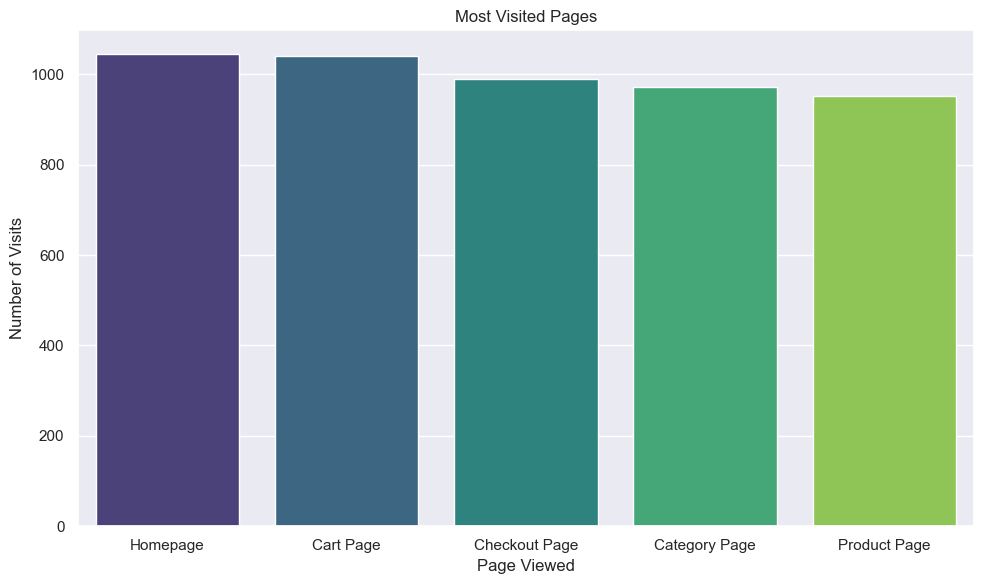

In [12]:
# Visualization 1: Bar plot for most visited pages
plt.figure(figsize=(10, 6))
sns.barplot(x=most_visited_pages.Visits, y=most_visited_pages.Page_Viewed, palette='viridis')
plt.title("Most Visited Pages")
plt.xlabel("Page Viewed")
plt.ylabel("Number of Visits")
plt.tight_layout()
plt.show()

most visited page : Homepage

### Average time spent on each page 

In [13]:
average_time_spent = pd.DataFrame(user_interactions_df.groupby('Page_Viewed')['Time_Spent_Seconds'].mean()).reset_index()
print("\nAverage Time Spent on Each Page:")
average_time_spent = average_time_spent.sort_values(by='Time_Spent_Seconds', ascending=False)
print(average_time_spent)


Average Time Spent on Each Page:
     Page_Viewed  Time_Spent_Seconds
3       Homepage          310.215311
2  Checkout Page          306.760364
4   Product Page          304.562434
0      Cart Page          302.819404
1  Category Page          297.839506


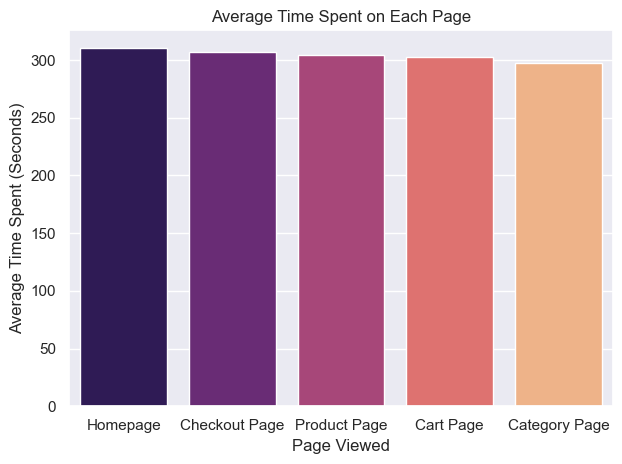

In [14]:
sns.barplot(x=average_time_spent.Page_Viewed, y=average_time_spent.Time_Spent_Seconds, palette='magma')
plt.title("Average Time Spent on Each Page")
plt.xlabel("Page Viewed")
plt.ylabel("Average Time Spent (Seconds)")
plt.tight_layout()
plt.show()

most average visited page : Homepage

### Click-Through Rate (CTR):


In [15]:
clicks_per_page = user_interactions_df.groupby("Page_Viewed")["User_ID"].count()
page_views_per_page = user_interactions_df.groupby("Page_Viewed")["Time_Spent_Seconds"].sum()

click_through_rate = (clicks_per_page / page_views_per_page)*100

In [16]:
clicks_per_page=pd.DataFrame(clicks_per_page)
clicks_per_page

,User_ID
Page_Viewed,
Cart Page,1041
Category Page,972
Checkout Page,989
Homepage,1045
Product Page,953


In [17]:
page_views_per_page=pd.DataFrame(page_views_per_page)
page_views_per_page

,Time_Spent_Seconds
Page_Viewed,
Cart Page,315235
Category Page,289500
Checkout Page,303386
Homepage,324175
Product Page,290248


In [18]:
click_through_rate_df = pd.DataFrame(click_through_rate, columns={"CTR"})
click_through_rate_df.sort_values(by='CTR',ascending=False,inplace=True)
click_through_rate_df

,CTR
Page_Viewed,
Category Page,0.335751
Cart Page,0.330230
Product Page,0.328340
Checkout Page,0.325987
Homepage,0.322357


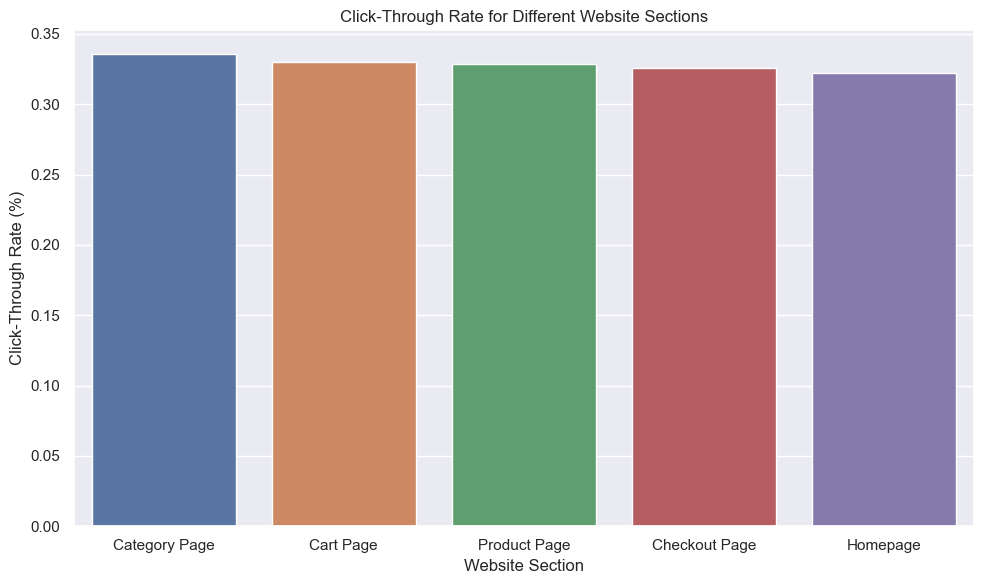

In [19]:
plt.figure(figsize=(10, 6))
sns.barplot(data=click_through_rate_df, x=click_through_rate_df.index, y=click_through_rate_df["CTR"])
plt.xlabel("Website Section")
plt.ylabel("Click-Through Rate (%)")
plt.title("Click-Through Rate for Different Website Sections")
plt.tight_layout()
plt.show()

### Purchase Analysis:


In [20]:
purchase_data_df["Purchase_Time"] = pd.to_datetime(purchase_data_df["Purchase_Time"])
purchase_data_df.sort_values(by="Purchase_Time", inplace=True)

In [21]:
# Calculate the overall conversion rate for the website
total_purchases = len(purchase_data_df)
unique_purchasers = len(purchase_data_df["User_ID"].unique())
overall_conversion_rate = (unique_purchasers / total_purchases) * 100

print("Overall Conversion Rate: {:.2f}%".format(overall_conversion_rate))

Overall Conversion Rate: 91.60%


In [22]:
# Top-Selling Products and Product Categories
# Identify the top-selling products
top_selling_products = purchase_data_df.groupby("Product_ID")["Transaction_Amount"].sum().reset_index()
top_selling_products = top_selling_products.sort_values(by='Transaction_Amount', ascending=False)

print("Top-Selling Products:")
top_selling_products

Top-Selling Products:


,Product_ID,Transaction_Amount
10,Product_19,7125.056901
8,Product_17,6711.316153
4,Product_13,6680.243756
13,Product_3,6375.983900
12,Product_20,6359.302691
18,Product_8,5780.766674
15,Product_5,5697.714155
14,Product_4,5581.543749
17,Product_7,5369.148281
3,Product_12,5363.519340


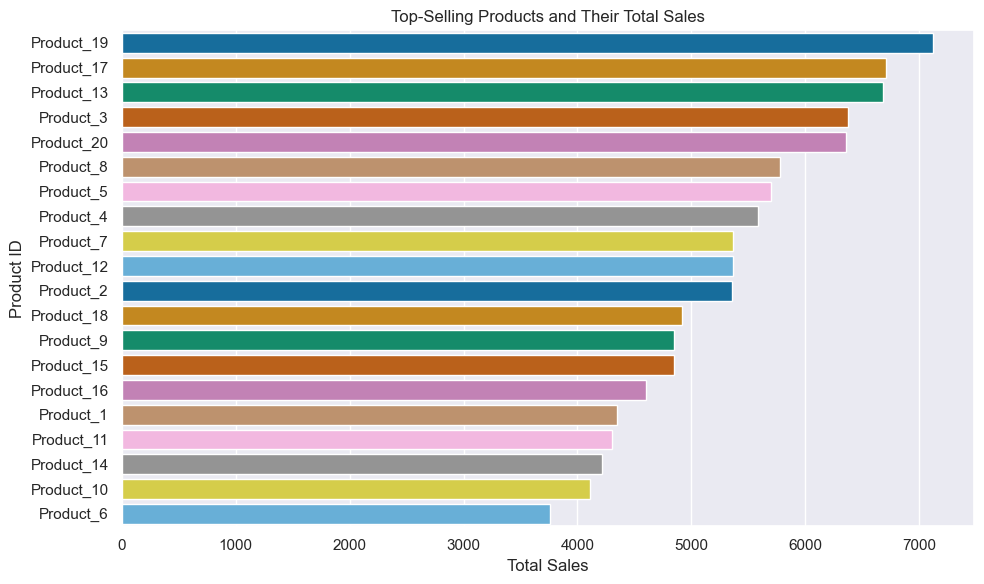

In [23]:
# Plotting the data using sns.barplot
plt.figure(figsize=(10, 6))
sns.barplot(data=top_selling_products, y="Product_ID", x="Transaction_Amount", palette='colorblind')
plt.ylabel("Product ID")
plt.xlabel("Total Sales")
plt.title("Top-Selling Products and Their Total Sales")
plt.tight_layout()
plt.show()

### Cohort Analysis:


In [24]:
purchase_data_df

,Purchase_ID,User_ID,Product_ID,Transaction_Amount,Purchase_Time
742,Purchase_843,User_1531,Product_13,135.854417,2023-01-01 14:17:21
386,Purchase_960,User_2621,Product_5,157.522460,2023-01-01 15:23:37
948,Purchase_966,User_2333,Product_7,196.253073,2023-01-01 22:08:04
156,Purchase_338,User_1946,Product_2,20.995437,2023-01-02 03:03:25
445,Purchase_750,User_3773,Product_2,65.055937,2023-01-02 12:43:07
...,...,...,...,...,...
513,Purchase_20,User_4027,Product_8,184.290431,2023-07-28 02:36:01
781,Purchase_696,User_982,Product_20,136.615615,2023-07-28 17:22:37
617,Purchase_407,User_1385,Product_18,156.422763,2023-07-28 18:55:29
644,Purchase_488,User_1774,Product_2,69.193960,2023-07-28 19:15:58


In [25]:
purchase_data_df = pd.read_csv("purchase_data.csv")

# Convert "Purchase_Time" column to datetime data type
purchase_data_df["Purchase_Time"] = pd.to_datetime(purchase_data_df["Purchase_Time"])

# Extract month and year from "Purchase_Time" to create a new column "Month_Year"
purchase_data_df["Month_Year"] = purchase_data_df["Purchase_Time"].dt.to_period("M")

# Group users by their cohort (sign-up month) and count the number of unique users in each cohort
cohorts = purchase_data_df.groupby("Month_Year")["User_ID"].nunique()

# Create a retention table to track how many users from each cohort made purchases in the subsequent months
retention_table = pd.pivot_table(data=purchase_data_df, index="Month_Year", columns="User_ID", values="Purchase_ID", aggfunc="count")

# Calculate the retention rate for each cohort over time
retention_rate = retention_table.divide(cohorts, axis=0) * 100

# Display the retention rate table
retention_rate

User_ID,User_1000,User_1013,User_1029,User_1031,User_1036,User_1038,User_1044,User_1045,User_1051,User_1054,...,User_967,User_974,User_975,User_98,User_982,User_983,User_987,User_989,User_990,User_998
Month_Year,,,,,,,,,,,,,,,,,,,,,
2023-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-02,NaN,NaN,NaN,NaN,NaN,NaN,0.775194,NaN,NaN,0.775194,...,0.775194,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.775194,NaN
2023-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.657895
2023-04,NaN,NaN,NaN,NaN,NaN,0.694444,NaN,NaN,0.694444,NaN,...,NaN,NaN,0.694444,0.694444,NaN,NaN,NaN,0.694444,NaN,NaN
2023-05,0.740741,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.740741,NaN,NaN,NaN
2023-06,NaN,0.729927,NaN,0.729927,0.729927,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.729927,NaN,NaN,NaN,NaN
2023-07,NaN,NaN,0.75188,NaN,NaN,NaN,NaN,0.75188,NaN,NaN,...,NaN,0.75188,NaN,NaN,0.75188,NaN,NaN,NaN,NaN,NaN


In [26]:
# Calculate the total revenue generated by each cohort of customers over their entire lifetime
cohorts_revenue = purchase_data_df.groupby("Month_Year")["Transaction_Amount"].sum()

cohorts_customers = purchase_data_df.groupby("Month_Year")["User_ID"].nunique()

# Calculate the average LTV for each cohort
ltv_cohorts = pd.DataFrame((cohorts_revenue / cohorts_customers),columns={'LTV'}).reset_index()

# Display the LTV for each cohort
print("Lifetime Value (LTV) for Each Cohort:")
ltv_cohorts

Lifetime Value (LTV) for Each Cohort:


,Month_Year,LTV
0,2023-01,105.458502
1,2023-02,109.106444
2,2023-03,104.351801
3,2023-04,108.827047
4,2023-05,112.932808
5,2023-06,108.308615
6,2023-07,109.981519


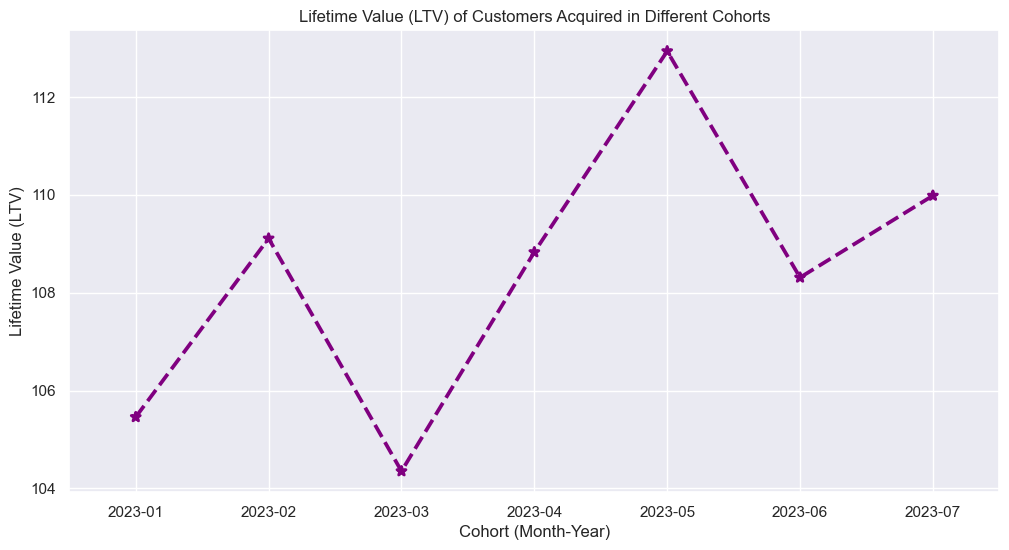

In [27]:
plt.figure(figsize=(12, 6))
sns.pointplot(data=ltv_cohorts, x="Month_Year", y="LTV",color='purple',linestyles='--',markers='*')
plt.xlabel("Cohort (Month-Year)")
plt.ylabel("Lifetime Value (LTV)")
plt.title("Lifetime Value (LTV) of Customers Acquired in Different Cohorts")
plt.grid(True)
plt.show()

### Website Performance Optimization:


#### Analyze website performance metrics 

In [33]:
#Analyze website performance metrics to identify areas for improvement.
website_performance_df["Month"] = pd.to_datetime(website_performance_df["Month"])
website_performance_df

,Month,Page_Load_Time,Bounce_Rate,Conversion_Rate
0,2023-01-01,5.106652,0.514345,0.047375
1,2023-02-01,7.828199,0.317157,0.062764
2,2023-03-01,3.239983,0.480903,0.050514
3,2023-04-01,5.954509,0.473572,0.057151
4,2023-05-01,9.872398,0.542407,0.089525
5,2023-06-01,7.333456,0.440715,0.048687
6,2023-07-01,3.372264,0.390081,0.048440
7,2023-08-01,7.115272,0.489165,0.038263
8,2023-09-01,8.384957,0.301692,0.063365
9,2023-10-01,2.468395,0.566843,0.065971


In [60]:
avg_Page_Load_Time = website_performance_df["Page_Load_Time"].mean()
high__Load_Time_months = website_performance_df[website_performance_df["Page_Load_Time"] > avg_Page_Load_Time]
high__Load_Time_months.sort_values(by="Page_Load_Time", ascending=False,inplace=True)
print('avg Page Load Time:',avg_Page_Load_Time)
print('high Page Load Time months:')
high__Load_Time_months.iloc[:,:2]

avg Page Load Time: 5.866266048900847
high Page Load Time months:


C:\Users\Soumapriyo Mondal\AppData\Local\Temp\ipykernel_15240\3319405551.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  high__Load_Time_months.sort_values(by="Page_Load_Time", ascending=False,inplace=True)


,Month,Page_Load_Time
4,2023-05-01,9.872398
8,2023-09-01,8.384957
1,2023-02-01,7.828199
5,2023-06-01,7.333456
7,2023-08-01,7.115272
3,2023-04-01,5.954509


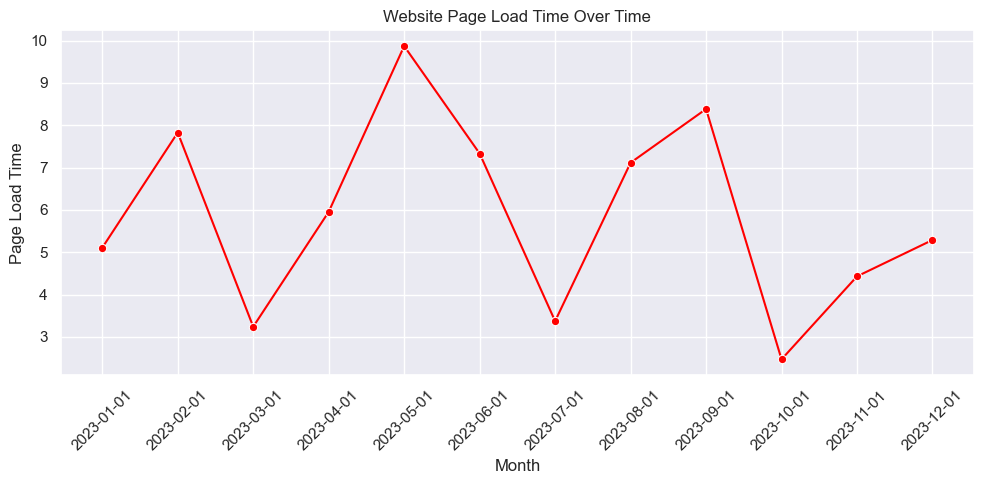

In [58]:
# Plot Page Load Time
plt.figure(figsize=(10, 5))
sns.lineplot(data=website_performance_df, x="Month", y="Page_Load_Time", marker="o",color='red')
plt.xlabel("Month")
plt.ylabel("Page Load Time")
plt.title("Website Page Load Time Over Time")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

In [63]:
avg_bounce_rate = website_performance_df["Bounce_Rate"].mean()
high_bounce_months = website_performance_df[website_performance_df["Bounce_Rate"] > avg_bounce_rate]
high_bounce_months.sort_values(by="Bounce_Rate", ascending=False,inplace=True)
print('avg bounce_rate:',avg_bounce_rate)
print('high bounce_rate months:')
print(high_bounce_months[['Month','Bounce_Rate']])
print()
# Analyze Conversion Rate
avg_conversion_rate = website_performance_df["Conversion_Rate"].mean()
conversion_change_months = website_performance_df[website_performance_df["Conversion_Rate"] != avg_conversion_rate]
conversion_change_months.sort_values(by="Conversion_Rate", ascending=False,inplace=True)
print('avg bounce_rate:',avg_conversion_rate)
print('high bounce_rate months:')
print(conversion_change_months[['Month','Conversion_Rate']])

avg bounce_rate: 0.4526503154628032
high bounce_rate months:
         Month  Bounce_Rate
9   2023-10-01     0.566843
4   2023-05-01     0.542407
10  2023-11-01     0.526560
0   2023-01-01     0.514345
7   2023-08-01     0.489165
2   2023-03-01     0.480903
3   2023-04-01     0.473572

avg bounce_rate: 0.06005589709726499
high bounce_rate months:
         Month  Conversion_Rate
4   2023-05-01         0.089525
11  2023-12-01         0.082828
9   2023-10-01         0.065971
10  2023-11-01         0.065786
8   2023-09-01         0.063365
1   2023-02-01         0.062764
3   2023-04-01         0.057151
2   2023-03-01         0.050514
5   2023-06-01         0.048687
6   2023-07-01         0.048440
0   2023-01-01         0.047375
7   2023-08-01         0.038263


C:\Users\Soumapriyo Mondal\AppData\Local\Temp\ipykernel_15240\3409612321.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  high_bounce_months.sort_values(by="Bounce_Rate", ascending=False,inplace=True)


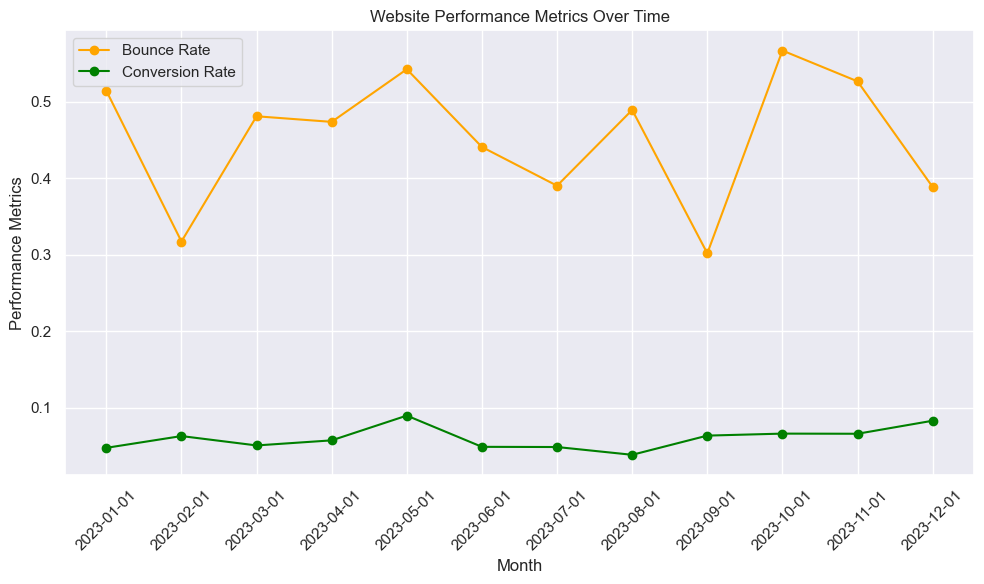

In [51]:
plt.figure(figsize=(10, 6))
# Plot Bounce Rate
plt.plot(website_performance_df["Month"], website_performance_df["Bounce_Rate"], marker="o", label="Bounce Rate", color="orange")

# Plot Conversion Rate
plt.plot(website_performance_df["Month"], website_performance_df["Conversion_Rate"], marker="o", label="Conversion Rate", color="green")

plt.xlabel("Month")
plt.ylabel("Performance Metrics")
plt.title("Website Performance Metrics Over Time")
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

In [34]:
import pandas as pd
import pandas_profiling

# Load the website performance data
website_performance_df = pd.read_csv("website_performance.csv")

# Generate the Pandas Profiling report
report = pandas_profiling.ProfileReport(website_performance_df)

# Save the report as an HTML file
report.to_file("website_performance_report.html")

C:\Users\Soumapriyo Mondal\AppData\Local\Temp\ipykernel_15240\3470406211.py:2: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  import pandas_profiling


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

Areas for improvement:
High Page Load Time Months: Some months have higher page load times, indicating a need for optimizing website elements, compressing images, leveraging caching, and improving server response time to enhance user experience.

High Bounce Rate Months: Certain months have higher bounce rates, which suggests visitors are leaving the website without further engagement. To address this, we should focus on improving website content, user experience, and page load speed.

Low Conversion Rate Months: Some months have lower conversion rates, indicating a need to optimize call-to-action elements, checkout processes (if applicable), and offer incentives to encourage conversions.

To address these issues and continuously monitor performance, we can implement strategies such as real-time monitoring dashboards, A/B testing, mobile optimization, user feedback collection, website analytics analysis, content relevance improvement, load testing, and data-driven decision-making to enhance user experience, reduce bounce rates, and improve conversion rates.

Some startegies you should follow to reduce bounce rate and improve the conversion rate.

Improve Website Speed: Optimize loading times to ensure pages load quickly and keep visitors engaged.Optimize page load time by compressing images, minimizing HTTP requests, and leveraging caching techniques to provide a seamless and fast user experience.

Enhance User Experience: Create an intuitive and visually appealing interface to make navigation seamless and enjoyable.

Compelling Content: Provide valuable and relevant content to capture visitors' interest and encourage them to explore further.

Personalization: Implement personalized recommendations based on user behavior to increase engagement.

Analyze and Adapt: Continuously monitor website performance and user feedback to make data-driven improvements over time.


I have created a dashboard to see the data to Analyze and Adapt
attached website_performance_report.html